# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from scipy import stats as st
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.preprocessing import OrdinalEncoder 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

data_0 = pd.read_csv('/datasets/geo_data_0.csv')
data_1 = pd.read_csv('/datasets/geo_data_1.csv')
data_2 = pd.read_csv('/datasets/geo_data_2.csv')

# Данные геологоразведки первый регион

In [2]:
data_0.shape

(100000, 5)

In [3]:
data_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


Пропуски в данных отсутсвуют

# Данные геологоразведки второй регион

In [5]:
data_1.shape

(100000, 5)

In [6]:
data_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [7]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


Пропуски в данных отсутсвуют

# Данные геологоразведки третий регион

In [8]:
data_2.shape

(100000, 5)

In [9]:
data_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [10]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


Пропуски в данных отсутсвуют

Для наглядности построим график распределения сырья в регионах

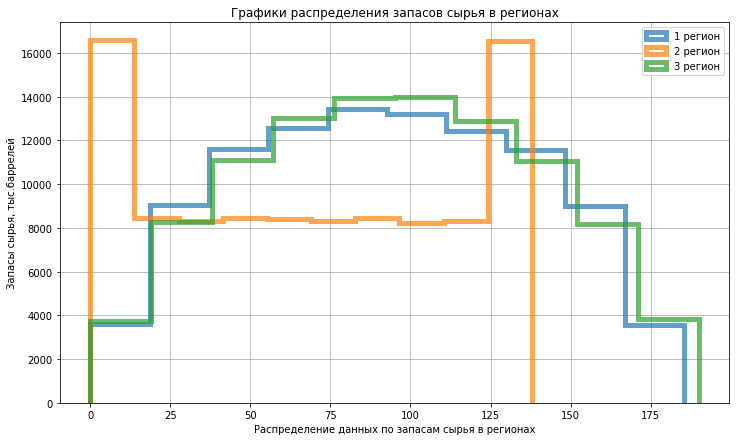

In [11]:
plt.title('Графики распределения запасов сырья в регионах')
ax=data_0['product'].plot(kind='hist',figsize=(12,7),grid=True, legend=True, alpha=0.7, histtype='step', linewidth=5, label='1 регион')
ax1=data_1['product'].plot(kind='hist',figsize=(12,7),grid=True, legend=True, alpha=0.7,histtype='step', linewidth=5, label='2 регион', ax=ax)
data_2['product'].plot(kind='hist',figsize=(12,7),grid=True, legend=True, alpha=0.7,histtype='step', linewidth=5, label='3 регион', ax=ax1)
plt.xlabel('Распределение данных по запасам сырья в регионах')
plt.ylabel('Запасы сырья, тыс.баррелей')
plt.show()

# Выводы

В данных отсутсвуют пропуски, дополнительных обработок не требуется. График нам показал, что 2 региона (1й и 3й) показывают одинаковую динамику. Во втором регионе наблюдаются скачки

## Обучение и проверка модели

In [12]:
target_0=data_0['product']
features_0=data_0.drop(['product', 'id'], axis=1)

target_1=data_1['product']
features_1=data_1.drop(['product','id'], axis=1)

target_2=data_2['product']
features_2=data_2.drop(['product','id'], axis=1)

# 1 регион 

In [13]:
features_train_0, features_valid_0, target_train_0, target_valid_0 = train_test_split(features_0, target_0, test_size=0.25, random_state=42)
tv=target_valid_0.shape[0]/target_0.shape[0]
tt=target_train_0.shape[0]/target_0.shape[0]
print('Размер тренировочной выборки- {:.0%}'.format(tt))
print('Размер валидационной выборки - {:.0%}'.format(tv))

Размер тренировочной выборки- 75%
Размер валидационной выборки - 25%


# 2 регион

In [14]:
features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(features_1, target_1, test_size=0.25, random_state=42)
tv=target_valid_1.shape[0]/target_1.shape[0]
tt=target_train_1.shape[0]/target_1.shape[0]
print('Размер тренировочной выборки- {:.0%}'.format(tt))
print('Размер валидационной выборки - {:.0%}'.format(tv))

Размер тренировочной выборки- 75%
Размер валидационной выборки - 25%


# 3 регион

In [15]:
features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(features_2, target_2, test_size=0.25, random_state=42)
tv=target_valid_0.shape[0]/target_0.shape[0]
tt=target_train_0.shape[0]/target_0.shape[0]
print('Размер тренировочной выборки- {:.0%}'.format(tt))
print('Размер валидационной выборки - {:.0%}'.format(tv))

Размер тренировочной выборки- 75%
Размер валидационной выборки - 25%


Обучим модель и сделаем предсказания на валидационной выборке, а так же оценим качество модели техникой RMSEи коэффициентом детерминации R2

In [16]:
model_0=LinearRegression()
model_0.fit(features_train_0,target_train_0)
predict_0=model_0.predict(features_valid_0)
rmse_0 = mean_squared_error(target_valid_0, predict_0)**0.5
print('Среднеквадратичная ошибка RMSE: %.2f'% rmse_0)
print('Коэффициент детерминации: %.2f' % r2_score(target_valid_0, predict_0))

Среднеквадратичная ошибка RMSE: 37.76
Коэффициент детерминации: 0.27


In [17]:
model_1=LinearRegression()
model_1.fit(features_train_1,target_train_1)
predict_1=model_1.predict(features_valid_1)
rmse_1 = mean_squared_error(target_valid_1, predict_1)**0.5
print('Среднеквадратичная ошибка RMSE: %.2f'% rmse_1)
print('Коэффициент детерминации: %.2f' % r2_score(target_valid_1, predict_1))

Среднеквадратичная ошибка RMSE: 0.89
Коэффициент детерминации: 1.00


In [18]:
model_2=LinearRegression()
model_2.fit(features_train_2,target_train_2)
predict_2=model_2.predict(features_valid_2)
rmse_2 = mean_squared_error(target_valid_2, predict_2)**0.5
print('Среднеквадратичная ошибка RMSE: %.2f'% rmse_2)
print('Коэффициент детерминации: %.2f' % r2_score(target_valid_2, predict_2))

Среднеквадратичная ошибка RMSE: 40.15
Коэффициент детерминации: 0.20


In [19]:
print('1 регион:\n- предсказания модели%.2f'%r2_score(target_valid_0, predict_0),'\n- правильные ответы:%.2f'%rmse_0 )

print('2 регион:\n- предсказания модели%.2f'%r2_score(target_valid_1, predict_1),'\n- правильные ответы:%.2f'%rmse_1 )
print('3 регион:\n- предсказания модели%.2f'%r2_score(target_valid_2, predict_2),'\n- правильные ответы:%.2f'%rmse_2 )


1 регион:
- предсказания модели0.27 
- правильные ответы:37.76
2 регион:
- предсказания модели1.00 
- правильные ответы:0.89
3 регион:
- предсказания модели0.20 
- правильные ответы:40.15


# Напечатаем на экране средний запас предсказанного сырья и RMSE модели

In [20]:
comparison_tabl = pd.DataFrame(index=['средний запас предсказанного сырья','RMSE модели'], columns=['1 регион','2 регион','3 регион'])
comparison_tabl['1 регион'] = predict_0.mean(), rmse_0
comparison_tabl['2 регион'] = predict_1.mean(), rmse_1
comparison_tabl['3 регион'] = predict_2.mean(), rmse_2
comparison_tabl

,1 регион,2 регион,3 регион
средний запас предсказанного сырья,92.3988,68.712878,94.771024
RMSE модели,37.7566,0.890280,40.145872


Вывод: Самый большой запас нам показывает 3й регион.

## Подготовка к расчёту прибыли

Ключевые значения для расчётов сохраняем в отдельных переменных.

При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
Бюджет на разработку скважин в регионе — 10 млрд рублей.
При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

In [21]:
Budg=10000000 
Price_one_bar=450
losses=2.5/100
point = 500
best_point = 200
product_mean_0 = data_0['product'].mean()
product_mean_1 = data_1['product'].mean()
product_mean_2 = data_2['product'].mean()

In [22]:
print('Cредний запас сырья в 1 регионе: %.2f млн.баррелей'%product_mean_0)
print('Cредний запас сырья в 2 регионе: %.2f млн.баррелей'%product_mean_1)
print('Cредний запас сырья в 3 регионе: %.2f млн.баррелей'%product_mean_2)

Cредний запас сырья в 1 регионе: 92.50 млн.баррелей
Cредний запас сырья в 2 регионе: 68.83 млн.баррелей
Cредний запас сырья в 3 регионе: 95.00 млн.баррелей


In [23]:
budg_per_1_point=(Budg/best_point)# тыс.руб
print('Бюджет на разработку одной скважины:', budg_per_1_point/1000,'млн.руб')

Бюджет на разработку одной скважины: 50.0 млн.руб


Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины

In [24]:
v_prod=budg_per_1_point/Price_one_bar
print('Объём каждой скважины для безубыточной разработки должен составлять не менее: %.2f'%v_prod,'тыс.баррелей')

Объём каждой скважины для безубыточной разработки должен составлять не менее: 111.11 тыс.баррелей


Сравним полученный объём сырья со средним запасом в каждом регионе

In [25]:
data_0['profit']=(data_0['product']*(Price_one_bar)).round(2) # profit, тыс.руб
data_0.head()

,id,f0,f1,f2,product,profit
0,txEyH,0.705745,-0.497823,1.221170,105.280062,47376.03
1,2acmU,1.334711,-0.340164,4.365080,73.037750,32866.99
2,409Wp,1.022732,0.151990,1.419926,85.265647,38369.54
3,iJLyR,-0.032172,0.139033,2.978566,168.620776,75879.35
4,Xdl7t,1.988431,0.155413,4.751769,154.036647,69316.49


Определим значение ROI для каждой скважины по отношению к затратам на разработку

In [26]:
data_0['roi_%']=((data_0['profit']-budg_per_1_point)/budg_per_1_point*100).round(2)
data_0.head()

,id,f0,f1,f2,product,profit,roi_%
0,txEyH,0.705745,-0.497823,1.221170,105.280062,47376.03,-5.25
1,2acmU,1.334711,-0.340164,4.365080,73.037750,32866.99,-34.27
2,409Wp,1.022732,0.151990,1.419926,85.265647,38369.54,-23.26
3,iJLyR,-0.032172,0.139033,2.978566,168.620776,75879.35,51.76
4,Xdl7t,1.988431,0.155413,4.751769,154.036647,69316.49,38.63


In [27]:
print('Разница объёма сырья для безубыточной разработки скважины относительно среднего значения по 1 региону составляет: {:.2%}'.format(product_mean_0/v_prod-1))
print('Или {:.2f} тыс.баррелей'.format(v_prod-product_mean_0))

Разница объёма сырья для безубыточной разработки скважины относительно среднего значения по 1 региону составляет: -16.75%
Или 18.61 тыс.баррелей


In [28]:
data_1['profit']=(data_1['product']*(Price_one_bar)).round(2) # profit, тыс.руб
data_1.head()

,id,f0,f1,f2,product,profit
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103,1430.60
1,62mP7,14.272088,-3.475083,0.999183,26.953261,12128.97
2,vyE1P,6.263187,-5.948386,5.001160,134.766305,60644.84
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408,62075.43
4,AHL4O,12.702195,-8.147433,5.004363,134.766305,60644.84


Определим значение ROI для каждой скважины по отношению к затратам на разработку

In [29]:
data_1['roi_%']=((data_1['profit']-budg_per_1_point)/budg_per_1_point*100).round(2)
data_1.head()

,id,f0,f1,f2,product,profit,roi_%
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103,1430.60,-97.14
1,62mP7,14.272088,-3.475083,0.999183,26.953261,12128.97,-75.74
2,vyE1P,6.263187,-5.948386,5.001160,134.766305,60644.84,21.29
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408,62075.43,24.15
4,AHL4O,12.702195,-8.147433,5.004363,134.766305,60644.84,21.29


In [30]:
print('Разница объёма сырья для безубыточной разработки скважины относительно среднего значения по 2 региону составляет: {:.2%}'.format(product_mean_1/v_prod-1))
print('Или {:.2f} тыс.баррелей'.format(v_prod-product_mean_1))

Разница объёма сырья для безубыточной разработки скважины относительно среднего значения по 2 региону составляет: -38.06%
Или 42.29 тыс.баррелей


In [31]:
data_2['profit']=(data_2['product']*(Price_one_bar)).round(2) # profit, тыс.руб
data_2.head()

,id,f0,f1,f2,product,profit
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673,12491.40
1,WJtFt,0.262778,0.269839,-2.530187,56.069697,25231.36
2,ovLUW,0.194587,0.289035,-5.586433,62.871910,28292.36
3,q6cA6,2.236060,-0.553760,0.930038,114.572842,51557.78
4,WPMUX,-0.515993,1.716266,5.899011,149.600746,67320.34


Определим значение ROI для каждой скважины по отношению к затратам на разработку

In [32]:
data_2['roi_%']=((data_2['profit']-budg_per_1_point)/budg_per_1_point*100).round(2)
data_2.head()

,id,f0,f1,f2,product,profit,roi_%
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673,12491.40,-75.02
1,WJtFt,0.262778,0.269839,-2.530187,56.069697,25231.36,-49.54
2,ovLUW,0.194587,0.289035,-5.586433,62.871910,28292.36,-43.42
3,q6cA6,2.236060,-0.553760,0.930038,114.572842,51557.78,3.12
4,WPMUX,-0.515993,1.716266,5.899011,149.600746,67320.34,34.64


In [33]:
print('Разница объёма сырья для безубыточной разработки скважины относительно среднего значения по 2 региону составляет: {:.2%}'.format(product_mean_2/v_prod-1))
print('Или {:.2f} тыс.баррелей'.format(v_prod-product_mean_2))

Разница объёма сырья для безубыточной разработки скважины относительно среднего значения по 2 региону составляет: -14.50%
Или 16.11 тыс.баррелей


Вывод: Как показали расчеты, в скважинах недостаточно сырья для работы хотя бы в ноль.

## Расчёт прибыли и рисков 

Выбераем скважины с максимальными значениями предсказаний.

In [34]:
predict_0

array([101.90101715,  78.21777385, 115.26690103, ...,  82.54439653,
        81.82668931,  93.12106221])

In [35]:
probs_sorted_0 = pd.Series(predict_0, index=target_valid_0.index).sort_values(ascending=False)
selected_max_0 = probs_sorted_0[:200]
selected_max_0

46784    176.536104
27658    176.274510
6496     173.249504
65743    172.802708
93716    172.744977
            ...    
14042    146.952653
65925    146.948764
65549    146.947483
9462     146.946515
39838    146.874947
Length: 200, dtype: float64

In [36]:
predict_1

array([  0.84473806,  52.92161194, 135.11038454, ...,  26.70873415,
       109.82308735, 135.44878039])

In [37]:
probs_sorted_1 = pd.Series(predict_1, index=target_valid_0.index).sort_values(ascending=False)
selected_max_1 = probs_sorted_1[:200]
selected_max_1

80439    139.983277
14041    139.700803
62413    139.616544
55563    139.514768
42432    139.472212
            ...    
99088    138.428338
5058     138.427500
80836    138.426488
78084    138.424348
77320    138.423809
Length: 200, dtype: float64

In [38]:
predict_2

array([ 98.30191642, 101.59246124,  52.4490989 , ...,  64.09839   ,
        83.76413542,  86.55864415])

In [39]:
probs_sorted_2 = pd.Series(predict_2, index=target_valid_0.index).sort_values(ascending=False)
selected_max_2 = probs_sorted_1[:200]
selected_max_2

80439    139.983277
14041    139.700803
62413    139.616544
55563    139.514768
42432    139.472212
            ...    
99088    138.428338
5058     138.427500
80836    138.426488
78084    138.424348
77320    138.423809
Length: 200, dtype: float64

Максиммальные значения предсказаний показывает регион 1

Просуммируем целевое значение объёма сырья, соответствующее этим предсказаниям.

In [40]:
selected_max_0_sum = selected_max_0.sum()
print('Сумма целевого значения объема сырья по региону 1:', selected_max_0.sum(),'тыс.бар')

Сумма целевого значения объема сырья по региону 1: 30881.463288146988 тыс.бар


In [41]:
selected_max_1_sum = selected_max_1.sum()
print('Сумма целевого значения объема сырья по региону 2:', selected_max_1.sum(),'тыс.бар')

Сумма целевого значения объема сырья по региону 2: 27748.75136666462 тыс.бар


In [42]:
selected_max_2_sum = selected_max_2.sum()
print('Сумма целевого значения объема сырья по региону 3:', selected_max_2.sum(),'тыс.бар')

Сумма целевого значения объема сырья по региону 3: 27748.75136666462 тыс.бар


Вывод: Максимальные значения по региону 1

Рассчитаем прибыль для полученного объёма сырья

In [43]:
profit_pred_0=(selected_max_0_sum*Price_one_bar)-Budg
print('Прибыль для полученного объёма сырья 1 регион составит %.2f тыс.рублей'%profit_pred_0)

Прибыль для полученного объёма сырья 1 регион составит 3896658.48 тыс.рублей


In [44]:
profit_pred_1=(selected_max_1_sum*Price_one_bar)-Budg
print('Прибыль для полученного объёма сырья 2 регион составит %.2f тыс.рублей'%profit_pred_1)

Прибыль для полученного объёма сырья 2 регион составит 2486938.11 тыс.рублей


In [45]:
profit_pred_2=(selected_max_2_sum*Price_one_bar)-Budg
print('Прибыль для полученного объёма сырья 3 регион составит %.2f тыс.рублей'%profit_pred_2)

Прибыль для полученного объёма сырья 3 регион составит 2486938.11 тыс.рублей


Вывод: самую высокую прибыль показывает 1й регион

Занесём все вычисления в функцию

In [46]:
def profit_for_vp(predict,target,count):
    probs_sorted = pd.Series(predict, index=target.index).sort_values(ascending=False)
    selected_max = probs_sorted[:count].sum()
    profit_pred=(selected_max*Price_one_bar)-Budg

    print('Суммарный запас сырья в 200 лучших скважинах составит: %.2f тыс.баррелей'%selected_max)
    print('Прибыль для полученного объёма сырья составит %.2f млн.рублей'%(profit_pred/1000))

1й регион

In [47]:
profit_for_vp(predict_0,target_valid_0,200)

Суммарный запас сырья в 200 лучших скважинах составит: 30881.46 тыс.баррелей
Прибыль для полученного объёма сырья составит 3896.66 млн.рублей


2й регион

In [48]:
profit_for_vp(predict_1,target_valid_1,200)

Суммарный запас сырья в 200 лучших скважинах составит: 27748.75 тыс.баррелей
Прибыль для полученного объёма сырья составит 2486.94 млн.рублей


3й регион

In [49]:
profit_for_vp(predict_2,target_valid_2,200)

Суммарный запас сырья в 200 лучших скважинах составит: 29728.85 тыс.баррелей
Прибыль для полученного объёма сырья составит 3377.98 млн.рублей


    Вывод: самую большую прибыль дают все регионы, но 1й регион самую высокую прибыль. Расчитаем окупаемость

# 5.Посчитаем риски и прибыль для каждого региона

Применим технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли

Найдём среднюю прибыль, 95%-й доверительный интервал и риск убытков

In [50]:
def profit_for_vp2(predict,target,count):
    probs_sorted = pd.Series(predict).sort_values(ascending=False)
    selected_points = target[probs_sorted.index][:count]
    product = selected_points.sum()
    revenue = product * Price_one_bar
    return revenue - Budg

In [55]:
def bootstap_1000(target,predict):
    values = []
    table = []
    count=0
    state = np.random.RandomState(12345)
    predict_e = pd.Series(predict,index=target.index)
    
    for i in tqdm(range(1000)):
        target_subsample = target.sample(n=point,replace=True, random_state=state)
  
        probs_subsample = predict_e[target_subsample.index]
        values.append(profit_for_vp2(probs_subsample,target_subsample, best_point))  
    for i in values:
        if i < 0:
            count +=1
    
    values = pd.Series(values)
    mean = values.mean()
    confidence_interval = st.t.interval(0.95, len(values)-1, values.mean(), values.sem())
    
    plt.title('Распределение прибыли')
    values.plot(kind="hist", grid=True, figsize=(8,5))
    plt.xlabel('Прибыль, тыс.руб')
    plt.ylabel('Количество')
    plt.show()

    
    
    low_95 = values.quantile(0.025)
    high_95 = values.quantile(0.975)
    
    print("Средняя прибыль: {:.2f} млн.руб".format(mean/1000))
    print('С вероятностью 95% прибыль в данном регионе будет составлять от: {:.2f} млн.руб до: {:.2f} млн.руб'.format((low_95/1000),(high_95/1000)))
    print("95%-ый доверительный интервал: от {:.2f} млн.руб до {:.2f} млн.руб". format((confidence_interval[0]/1000),(confidence_interval[1]/1000)))
    print ('Процент вероятности убытка в данном регионе составит {:.1%}'.format(count/1000))
    
    return mean, low_95, high_95, (values<0).mean()

Распределение прибыли 1 регион

  0%|          | 0/1000 [00:00<?, ?it/s]

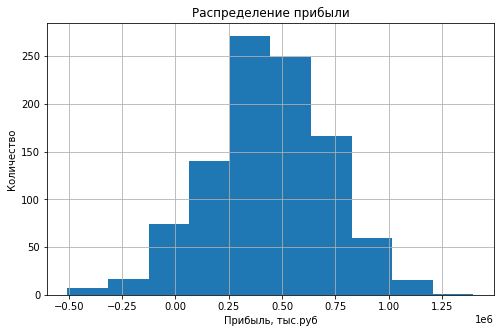

Средняя прибыль: 435.93 млн.руб
С вероятностью 95% прибыль в данном регионе будет составлять от: -116.23 млн.руб до: 966.50 млн.руб
95%-ый доверительный интервал: от 418.76 млн.руб до 453.11 млн.руб
Процент вероятности убытка в данном регионе составит 6.1%


In [56]:
result_0=bootstap_1000(target_valid_0,predict_0)

Распределение прибыли 2 регион

  0%|          | 0/1000 [00:00<?, ?it/s]

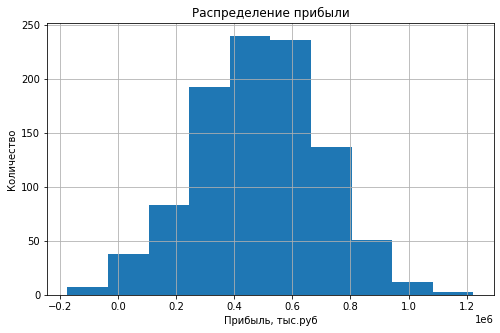

Средняя прибыль: 489.66 млн.руб
С вероятностью 95% прибыль в данном регионе будет составлять от: 55.12 млн.руб до: 905.76 млн.руб
95%-ый доверительный интервал: от 476.23 млн.руб до 503.09 млн.руб
Процент вероятности убытка в данном регионе составит 1.1%


In [57]:
result_1=bootstap_1000(target_valid_1,predict_1)

Распределение прибыли 3 регион

  0%|          | 0/1000 [00:00<?, ?it/s]

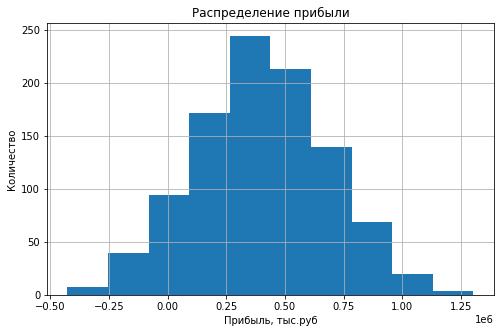

Средняя прибыль: 403.69 млн.руб
С вероятностью 95% прибыль в данном регионе будет составлять от: -153.12 млн.руб до: 952.89 млн.руб
95%-ый доверительный интервал: от 386.21 млн.руб до 421.17 млн.руб
Процент вероятности убытка в данном регионе составит 7.1%


In [58]:
result_2=bootstap_1000(target_valid_2,predict_2);

Сравним среднюю прибыль, вероятность убытка и суммарный запас сырья трёх представленных регионов в таблице

In [64]:
pd.DataFrame(np.array([result_0, result_1, result_2]), columns=['mean', 'low_95', 'high_95', 'risk'])

,mean,low_95,high_95,risk
0,435933.772139,-116231.612777,966504.180707,0.061
1,489661.254412,55116.177274,905762.650425,0.011
2,403687.927862,-153116.984762,952887.416708,0.071


# Вывод

Исходя из проведенного исследования видно, не смотря на то, что самый большой запас нам показываеи 1й регион, разрабатывать прибыльно будет второй регион. Так как у него сымый низкий риск получить убыток - менее 2,5%. 